**Demographics & Socioeconomic**
1. id — Unique identifier for each patient (not predictive; used for indexing).
2. age — Age in years; diabetes risk increases with age.
3. gender — Biological sex; risk patterns differ between males and females.
4. ethnicity — Ethnic background; some groups have higher baseline diabetes risk.
5. education_level — Highest education attained; proxy for health literacy and lifestyle behavior.
6. income_level — Socioeconomic status; influences diet, healthcare access, stress level.
7. employment_status — Employment situation; may correlate with activity level, stress, or access to healthcare.

**Lifestyle & Habits**
1. alcohol_consumption_per_week — Units of alcohol consumed weekly; heavy use can influence metabolic health.
2. physical_activity_minutes_per_week — Total weekly exercise minutes; higher activity lowers diabetes risk.
3. diet_score — Quality of diet (higher = healthier); diet strongly affects diabetes risk.
4. sleep_hours_per_day — Daily sleep duration; poor sleep is linked to glucose dysregulation.
5. screen_time_hours_per_day — Sedentary behavior measure; higher screen time may mean lower physical activity.
6. smoking_status — Smoking category (current/former/never); smoking increases insulin resist

**Anthropometrics & Physical Health**
1. bmi — Body mass index; higher BMI is strongly associated with diabetes.
2. waist_to_hip_ratio — Central obesity metric; visceral fat is a major risk factor.
3. systolic_bp — Systolic blood pressure; hypertension often co-occurs with diabetes.
4. diastolic_bp — Diastolic blood pressure.
5. heart_rate — Resting heart rate; elevated rates can reflect poor cardiovascular/metabolic health.

**Blood Biomarkers**
1. cholesterol_total — Overall cholesterol level; metabolic syndrome indicator.
2. hdl_cholesterol — “Good” cholesterol; low HDL is linked to insulin resistance.
3. ldl_cholesterol — “Bad” cholesterol; high LDL relates to cardiovascular risk.
4. triglycerides — High triglycerides strongly correlate with metabolic syndrome and diabetes.

**Medical & Family History**
1. family_history_diabetes — Whether immediate family members have diabetes; strong genetic component.
2. hypertension_history — Past diagnosis of high blood pressure; linked to metabolic dysregulation.
3. cardiovascular_history — Past heart-related conditions; ties closely with metabolic health.

**Target**

diagnosed_diabetes — Binary label (0/1) or probability, indicating whether the patient has diabetes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/train.csv")
orig = pd.read_csv("dataset/diabetes_dataset.csv")

In [3]:
orig.shape, df.shape

((100000, 31), (700000, 26))

In [4]:
orig.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [3]:
df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [5]:
orig.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [4]:
df.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


#### What is the class balance? (% of diabetes cases) Is the dataset highly imbalanced (<10% or >90% positive class)?

In [5]:
df['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

In [6]:
positive_ratio = df['diagnosed_diabetes'].mean()
print(f"Positive class ratio: {positive_ratio:.2%}")

Positive class ratio: 62.33%


> dataset is not highly imbalanced. It’s somewhat skewed toward positives!

#### Do continuous features show linear or non-linear relationships with the target?

In [10]:
from scipy.stats import pointbiserialr
# Select only numeric columns (excluding the target itself)
numeric_features = df.select_dtypes(include=['int64','float64']).columns.drop('diagnosed_diabetes')

# Compute point-biserial correlation for each numeric feature vs target
results = {}
for col in numeric_features:
    corr, pval = pointbiserialr(df[col], df['diagnosed_diabetes'])
    results[col] = {'correlation': corr, 'p_value': pval}

In [11]:
corr_df = pd.DataFrame(results).T
print(corr_df.sort_values(by='correlation', ascending=False))

                                    correlation        p_value
family_history_diabetes                0.211064   0.000000e+00
age                                    0.161162   0.000000e+00
systolic_bp                            0.107132   0.000000e+00
bmi                                    0.105580   0.000000e+00
ldl_cholesterol                        0.102771   0.000000e+00
triglycerides                          0.090635   0.000000e+00
cholesterol_total                      0.088112   0.000000e+00
waist_to_hip_ratio                     0.081050   0.000000e+00
diastolic_bp                           0.036271  2.080722e-202
hypertension_history                   0.029979  6.686979e-139
cardiovascular_history                 0.024746   3.008730e-95
heart_rate                             0.023865   1.014166e-88
screen_time_hours_per_day              0.018213   1.941133e-52
sleep_hours_per_day                    0.003509   3.329976e-03
alcohol_consumption_per_week           0.002991   1.233

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = df[numeric_features]
y = df['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

# Non-linear model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("Logistic Regression AUC:", log_auc)
print("Random Forest AUC:", rf_auc)

#### Are there obvious "threshold effects" (e.g., BMI >30 sharply increases diabetes risk)?

In [ ]:
df_cpy = df.copy()  # safety

# Dictionary of bin edges for each feature (clinically meaningful bins)
bin_config = {
    'bmi': [0, 25, 30, 35, 40, 60],
    'waist_to_hip_ratio': [0, .85, .9, .95, 1.0, 2.0],
    'systolic_bp': [0, 120, 130, 140, 160, 220],
    'diastolic_bp': [0, 80, 90, 100, 120],
    'cholesterol_total': [0, 160, 200, 240, 300, 400],
    'hdl_cholesterol': [0, 40, 50, 60, 90],
    'ldl_cholesterol': [0, 100, 130, 160, 190, 300],
    'triglycerides': [0, 100, 150, 200, 300, 600],
    'physical_activity_minutes_per_week': [0, 30, 90, 150, 300, 600, 2000],
    'sleep_hours_per_day': [0, 5, 6, 7, 8, 10, 14],
}

In [ ]:
results = {}

for feature, bins in bin_config.items():
    label_name = f"{feature}_bin"
    df_cpy[label_name] = pd.cut(df_cpy[feature], bins=bins, include_lowest=True)
    diabetes_rate = df_cpy.groupby(label_name, observed=True)['diagnosed_diabetes'].mean()
    results[feature] = diabetes_rate

for feature, res in results.items():
    print("="*60)
    print(feature.upper())
    print(res)

> There are no obvious 'threshold effects' in top 10 most suspect features!

#### Are continuous features on vastly different scales? (e.g., age: 20-80, cholesterol: 150-300)

In [27]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.drop('diagnosed_diabetes')
df[numeric_features].head(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0


> Continuous feature are on different scales!  

#### Are features heavily skewed or have outliers? Are distributions roughly normal or highly non-normal?

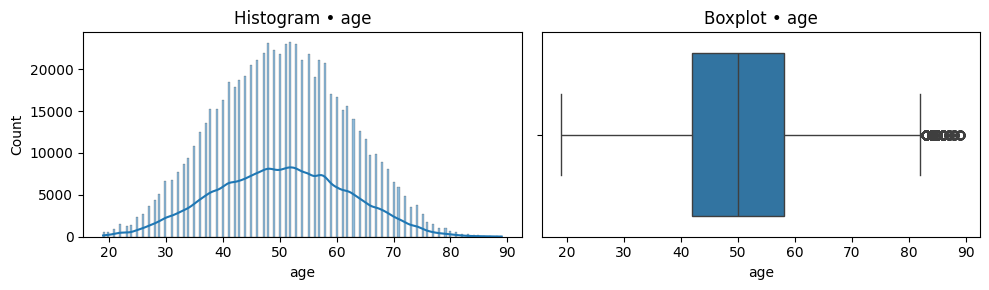

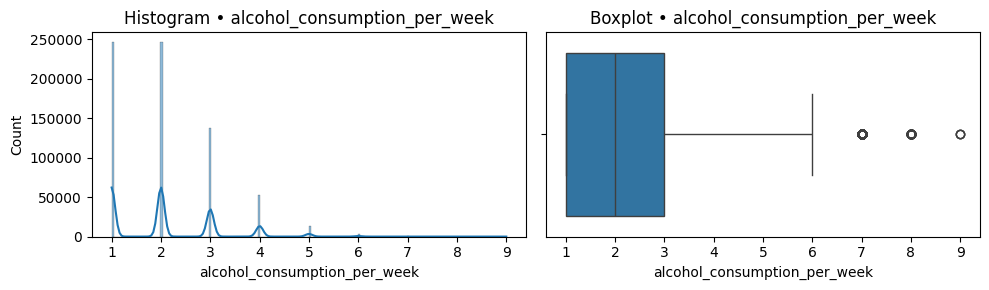

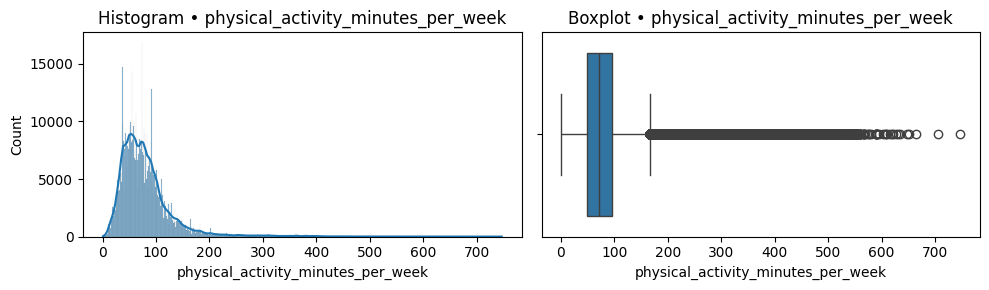

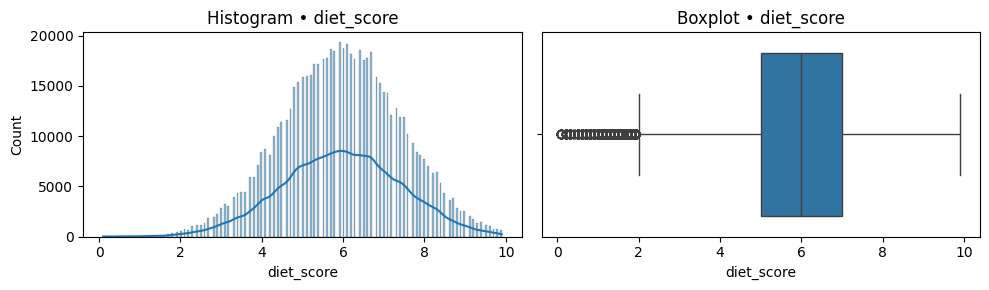

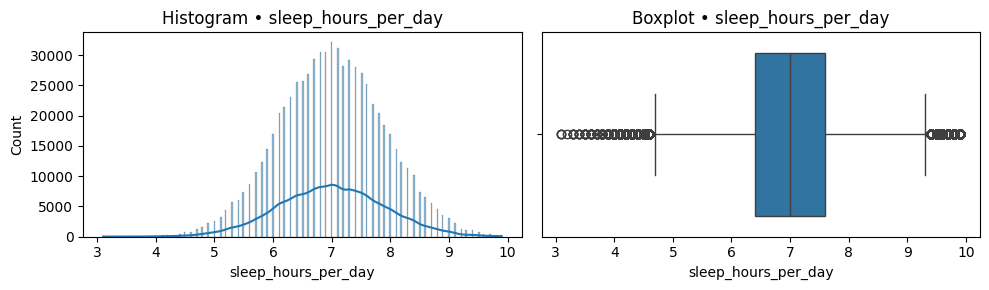

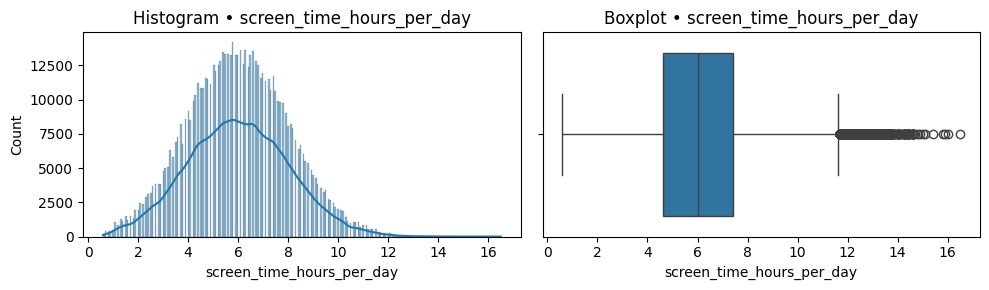

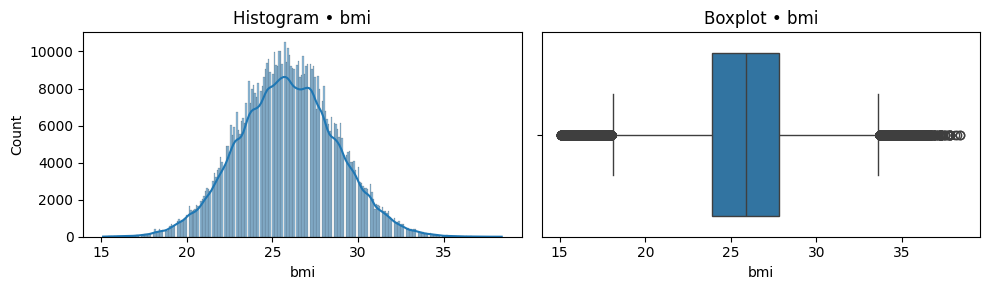

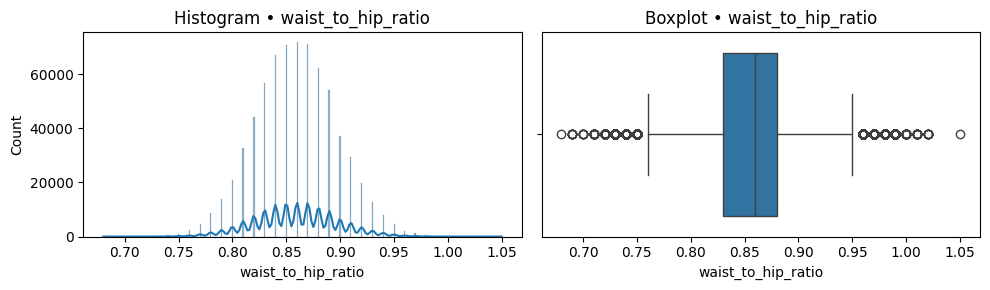

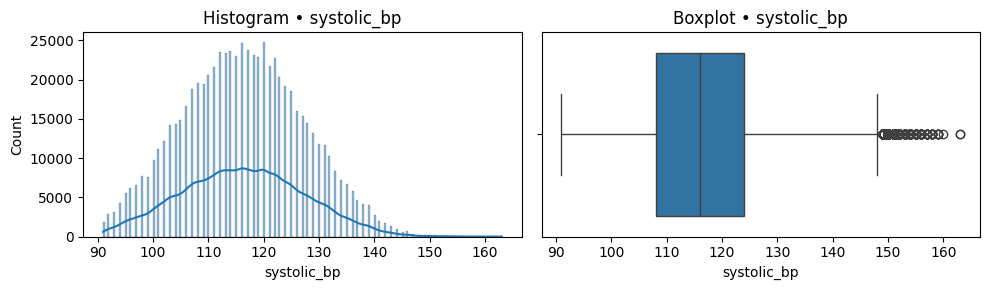

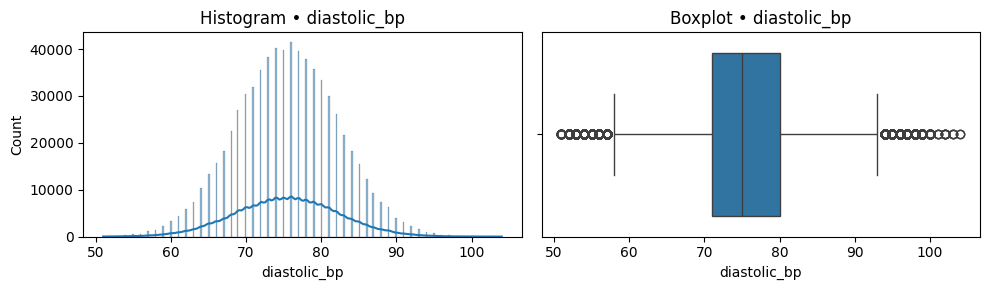

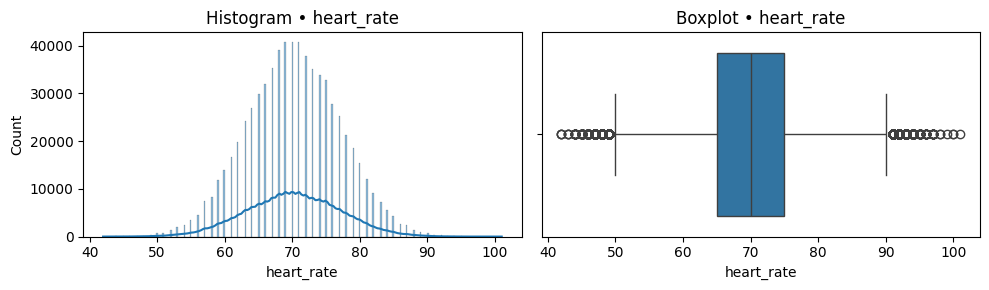

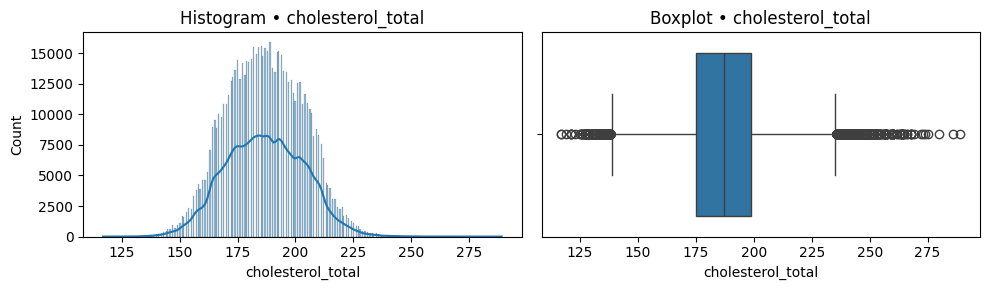

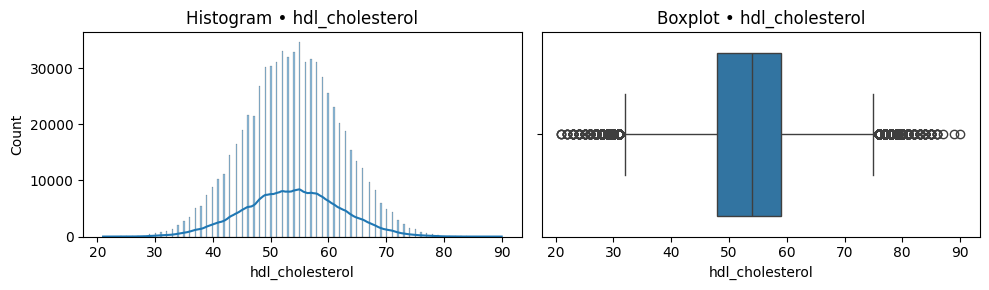

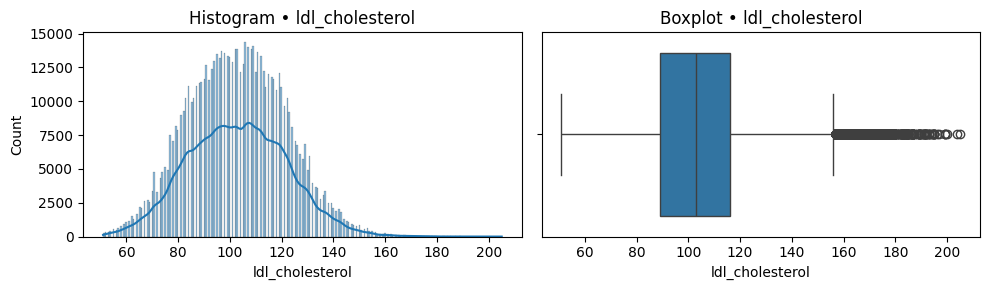

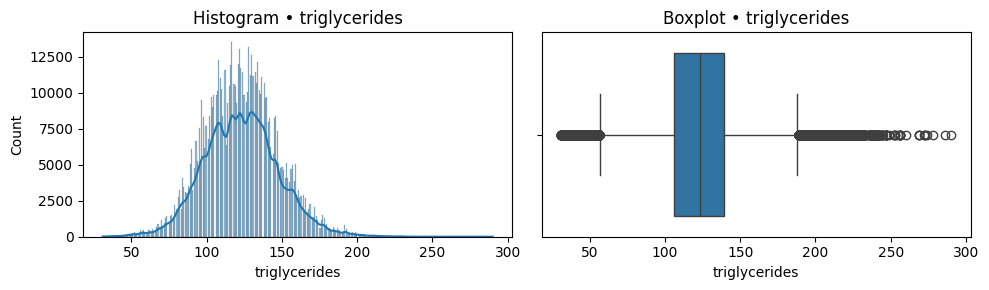

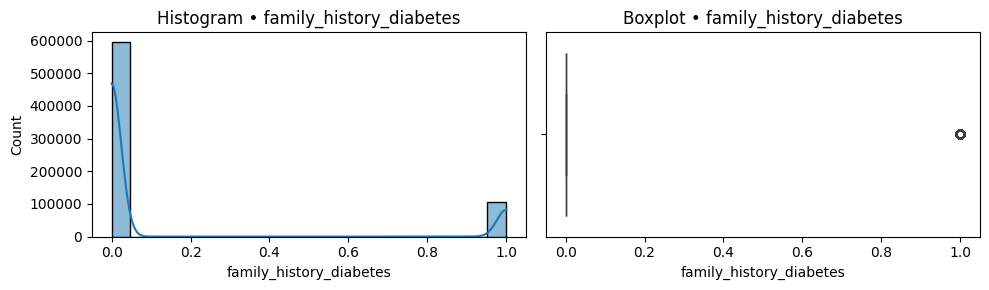

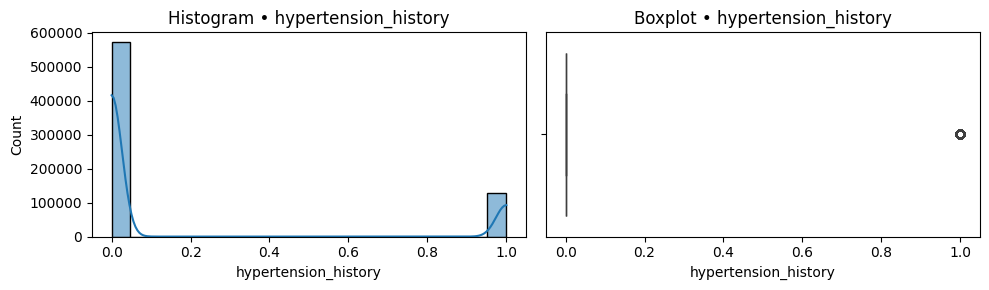

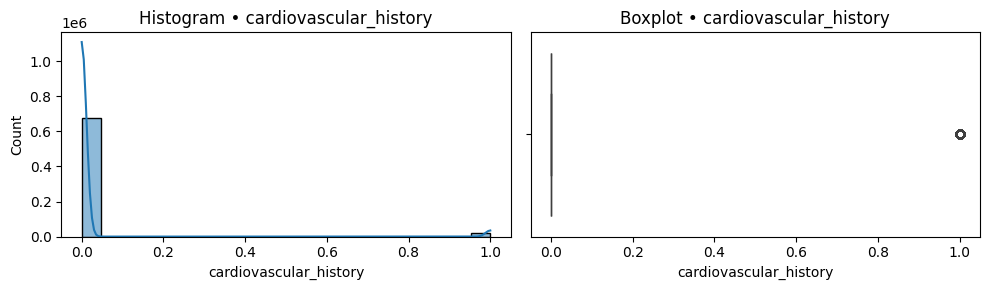

In [29]:
numeric_cols = df.select_dtypes(include='number').columns.drop(['id', 'diagnosed_diabetes'])

for col in numeric_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram • {col}')
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot • {col}')
    plt.tight_layout()
    plt.show()

> Most features follow an approximately normal distribution, although outliers are present in nearly all of them. One variable (physical activity minutes per week) shows strong right skewness, while several others show mild skewness.  
Distributions are almost normal for continuous features!  

#### How many unique categories in each categorical feature? Do categorical features have natural ordering (ordinal) or not (nominal)?

In [31]:
cat_cols = df.select_dtypes(include='object').columns
for cat in cat_cols:
    print(f"Number of Unique Features in {cat}:", df[cat].nunique())

Number of Unique Features in gender: 3
Number of Unique Features in ethnicity: 5
Number of Unique Features in education_level: 4
Number of Unique Features in income_level: 5
Number of Unique Features in smoking_status: 3
Number of Unique Features in employment_status: 4


In [36]:
df[cat_cols].head(2)

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed


> The dataset includes several categorical variables. Gender, ethnicity, and employment status are nominal and do not have a natural ordering. Education level, income level, and smoking status are ordinal, because their categories represent increasing progression (e.g., higher education or higher smoking exposure).

#### Are many features highly correlated with each other (>0.8)?

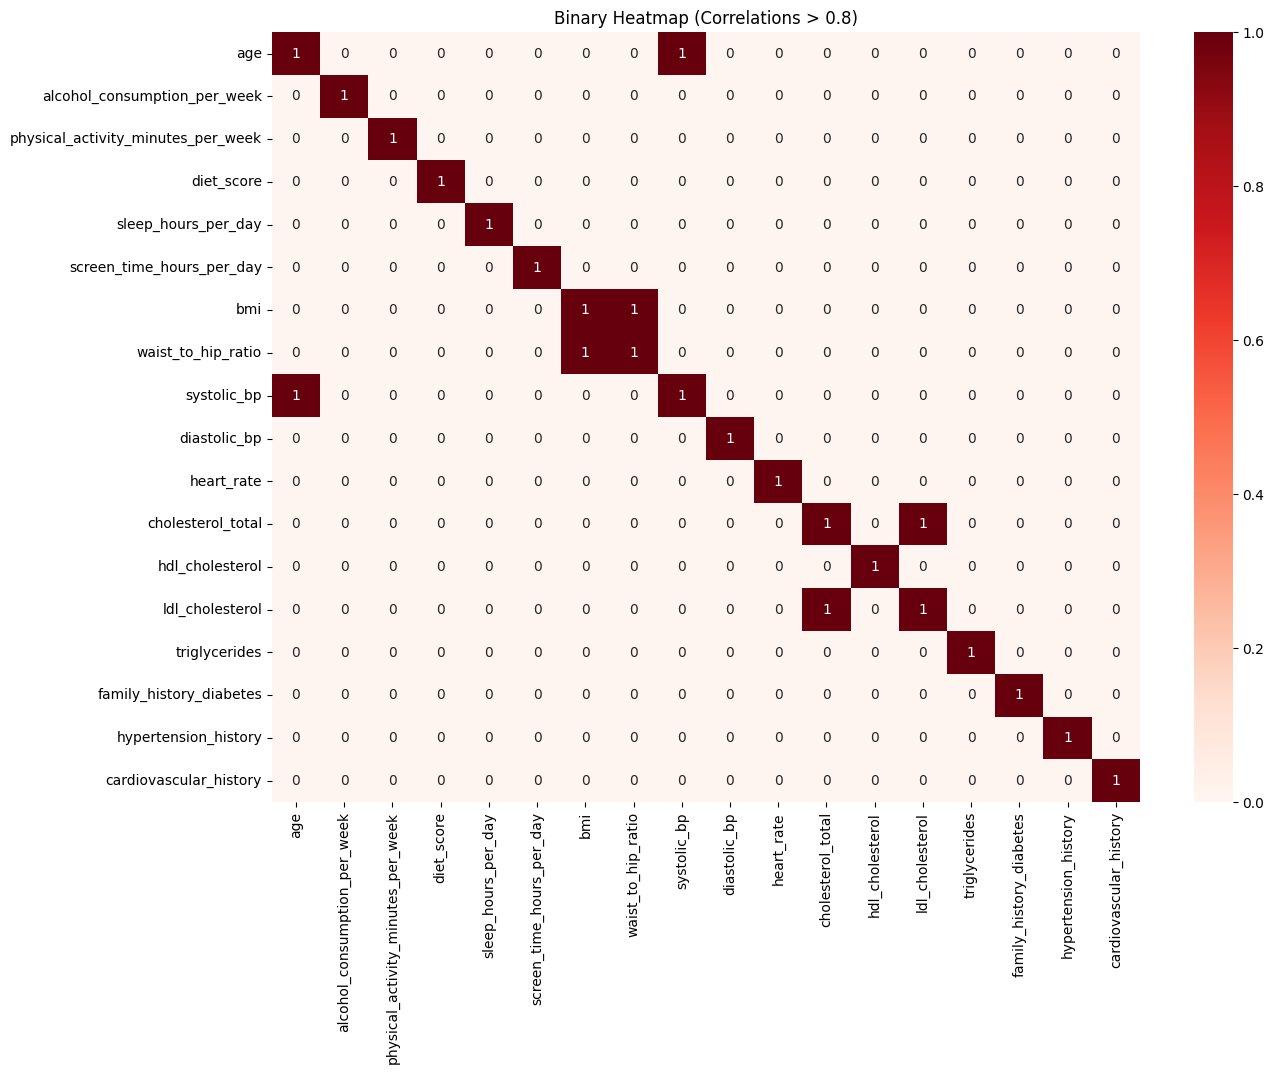

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr().abs() > 0.5,
            annot=True,
            cmap='Reds')
plt.title("Binary Heatmap (Correlations > 0.8)")
plt.show()

> The correlation matrix shows only one pair of very highly correlated features: total cholesterol and LDL cholesterol (correlation > 0.8). Three additional pairs exhibit moderate-to-high correlations (0.5–0.8), including systolic blood pressure vs. age and waist-to-hip ratio vs. BMI. All other correlations are weaker than 0.5. Overall, there is no severe multicollinearity among most features.

In [25]:
df.head(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,bin
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0,"(18.999, 35.0]"
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0,"(47.0, 50.0]"
